In [ ]:

import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr


In [2]:

# initializing a random numpy array
arr = np.random.randn(1000)
 
# creating a file
with h5py.File('test.hdf5', 'w') as f:
    dset = f.create_dataset("default", data = arr)

In [3]:
# open the file as 'f'
with h5py.File('test.hdf5', 'r') as f:
    data = f['default']
     
    # get the minimum value
    print(min(data))
     
    # get the maximum value
    print(max(data))
     
    # get the values ranging from index 0 to 15
    print(data[:15])
    

-3.5557307534436595
5.436035980008036
[ 1.28827428  0.83139076  0.10504151 -2.41557573 -1.35825391  0.54237604
 -1.1733309   0.9146841   2.87422097 -1.3174379  -0.57265747 -0.80033676
 -0.74125906 -0.28818139 -0.16614466]


['fields']
(425, 720)


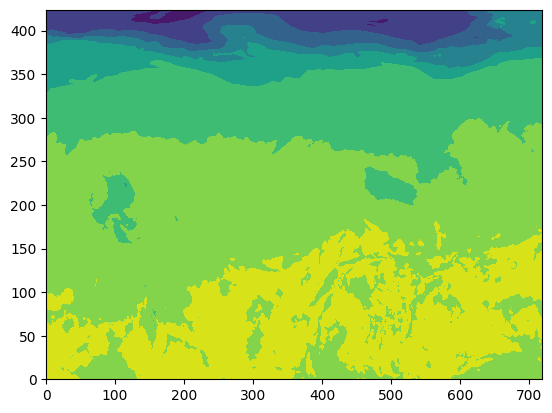

In [4]:


#check the era5 data
f1 = h5py.File('2021.h5', 'r')
list(f1.keys())
print(list(f1.keys()))


    
with h5py.File('2021.h5', 'r') as f:
   my_array = f['fields'][632,2,255:680,0:720]#2021-06-14,t2m,
   
   print(np.shape(my_array))

fig,ax=plt.subplots(1,1)
cp = ax.contourf(my_array)


In [ ]:
import h5py
filename = "2021.h5"

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    #ds_arr = f[a_group_key][()]  # returns as a numpy array
    print(ds_obj)

Keys: <KeysViewHDF5 ['fields']>
<class 'h5py._hl.dataset.Dataset'>


In [ ]:

#check for the ECMWF data-controlled forecast
ds_pl_cf = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/ecmwf_forecasts/fc_cf_20220101_00_pl.grb',indexpath='/tmp/mygrib.{short_hash}.idx',engine = 'cfgrib')
ds_pl_cf

In [ ]:
#check for the ECMWF data-perturbed forecast
ds_pl_pf = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/ecmwf_forecasts/fc_pf_20220101_00_pl.grb',indexpath='/tmp/mygrib.{short_hash}.pf.idx',engine = 'cfgrib')
ds_pl_pf

In [ ]:
#geopotential height-controlled forecast
ds_pl_cf.z.isel(step = 32, isobaricInhPa = 0)
ds_pl_cf.z.isel(step = 32, isobaricInhPa = 0).plot()



In [ ]:
#temperature-controlled forecast
ds_pl_cf.t.isel(step = 32, isobaricInhPa = 0).plot()

In [ ]:
#another way to check the era5 data
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era

In [ ]:
#plot for the era5 data
ds_era.fields[165,2,255:720,0:480].plot()  #2021-06-14,t2m,


In [ ]:
#check for the forecastnet data-2022-ensemble
ds_fcn = xr.open_dataset('/pfs/work7/workspace/scratch/vt0186-fcn/predictions/ensemble_2022.h5')
ds_fcn

In [ ]:
print(ds_fcn.ground_truth[0,0,0,0,0])#lon,time_step,variables,?,?,?

In [ ]:
ds_fcn.ground_truth[:,0,0,0,0].plot()

In [ ]:
#plot for the ECMWF data with map-temperature
def main():

        #-- open netcdf file
        ds = ds_pl_cf

        fig = plt.figure(figsize=(12,6))

        #-- choose map projection
        ax = plt.axes(projection=ccrs.PlateCarree())

        #-- add coastlines, country border lines, and grid lines
        ax.coastlines(zorder=5)

        ax.set_title('Temperature-850hpa-2022-01-01', fontsize=12, fontweight='bold')

        #-- create states outlines
        states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                    name='admin_1_states_provinces_lines',
                                    scale='50m', facecolor='none')
        ax.add_feature(cfeature.BORDERS, linewidth=0.6, edgecolor='gray', zorder=1)
        ax.add_feature(states_provinces, edgecolor='gray', zorder=2)

        ax.gridlines(draw_labels=True,
                     linewidth=0.5,
                     color='gray',
                     zorder=3,
                     xlocs=range(-10,40,15),
                     ylocs=range(35,75,15))
        cnplot = ax.contourf(ds.longitude, ds.latitude, ds.t[0,0,:,:],cmap='jet',levels=15,zorder=0,transform=ccrs.PlateCarree())

        #-- add colorbar
        cbar = plt.colorbar(cnplot, orientation='horizontal', pad=0.1, shrink=0.6)
        cbar.set_label('K')

       # vplot = ax.quiver(ds.lon[::2], ds.lat[::2],
                      #ds.u10[0,::2,::2],
                      #ds.v10[0,::2,::2],
                      #scale_units='xy',
                      #scale=2.5,
                      #angles='xy',
                      #transform=ccrs.PlateCarree())

       #vref = ax.quiverkey(vplot, 0.79, 0.25, 20,
                            #r'$20 \frac{m}{s}$',
                            #labelpos='E',
                        #coordinates='figure', zorder=5)


        plt.savefig('plot_matplotlib_vector_on_contour_rect.png', bbox_inches='tight',
                     dpi=100)

if __name__ == '__main__':
    main()
       

In [ ]:
#plot for the ERA5 data with map-temperature-2m ds_era.fields[165,2,255:720,0:480].plot() 
def main():

        #-- open netcdf file
        #ds = ds_pl_cf
        
        fig = plt.figure(figsize=(16,7))
        

        #-- choose map projection
        ax = plt.axes(projection=ccrs.PlateCarree())
        #fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)

        #-- add coastlines, country border lines, and grid lines
        ax.coastlines(zorder=5)

        ax.set_title('T2m-2021-06-14', fontsize=12, fontweight='bold')

        #-- create states outlines
        states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                    name='admin_1_states_provinces_lines',
                                    scale='50m', facecolor='none')
        ax.add_feature(cfeature.BORDERS, linewidth=0.6, edgecolor='gray', zorder=1)
        #ax.add_feature(states_provinces, edgecolor='gray', zorder=2)

        #ax.gridlines(draw_labels=True,
                    # linewidth=0.5,
                     #color='gray',
                     #zorder=3,
                     #xlocs=range(-180,180,30),
                     #ylocs=range(-90,90,30))
        
        #plt.imshow(s_era.fields[632,2,255:680,0:720], extent=[x.min(), x.max(), y.min(), y.max()], cmap='gray', origin='lower')
        
        cnplot = ax.contourf(ds_era.fields[632,2,:,:],cmap='seismic',levels=20,zorder=0,transform=ccrs.PlateCarree())
        
        #-- add colorbar
        cbar = plt.colorbar(cnplot, orientation='horizontal',pad=0.1, shrink=0.6)
        cbar.set_label('K')

       # vplot = ax.quiver(ds.lon[::2], ds.lat[::2],
                      #ds.u10[0,::2,::2],
                      #ds.v10[0,::2,::2],
                      #scale_units='xy',
                      #scale=2.5,
                      #angles='xy',
                      #transform=ccrs.PlateCarree())

       #vref = ax.quiverkey(vplot, 0.79, 0.25, 20,
                            #r'$20 \frac{m}{s}$',
                            #labelpos='E',
                        #coordinates='figure', zorder=5)


        #plt.savefig('plot_matplotlib_vector_on_contour_rect.png', bbox_inches='tight',
                     #dpi=100)
        
if __name__ == '__main__':
    main()
       

In [ ]:
print(np.max(ds_era.fields[632,2,255:680,0:720]))

In [ ]:

fig = plt.figure(figsize=(16,7))
        


ax = plt.axes(projection=ccrs.PlateCarree())


#-- add coastlines, country border lines, and grid lines
ax.coastlines(zorder=5)

ax.set_title('T2m', fontsize=12, fontweight='bold')

#-- create states outlines
states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                    name='admin_1_states_provinces_lines',
                                    scale='50m', facecolor='none')
ax.add_feature(cfeature.BORDERS, linewidth=0.6, edgecolor='gray', zorder=1)
#ax.add_feature(states_provinces, edgecolor='gray', zorder=2)

ax.gridlines(draw_labels=True,linewidth=0.5,color='gray',zorder=3, xlocs=range(-180,180,30),ylocs=range(25,85,30))
        
        
cnplot = ax.contourf(ds_era.fields[169,2,255:680,0:720],cmap='jet',levels=20,zorder=0,transform=ccrs.PlateCarree())
cbar = plt.colorbar(cnplot, orientation='horizontal', pad=0.1, shrink=0.6)
cbar.set_label('K')



